# Data Analysis

In [1]:
import pandas as pd
import numpy as np

# pour visualiser les plot
import matplotlib.pyplot as plt
%matplotlib inline

# pour afficher toutes les colonnes
pd.pandas.set_option('display.max_columns', None)

In [2]:
# importation du dataset
data = pd.read_csv('Data/dvf.csv', low_memory=False)

# nb colonnes et lignes
print(data.shape)

# visualisation du dataset
data.head()

(2224142, 17)


,id_mutation,date_mutation,nature_mutation,valeur_fonciere,adresse_nom_voie,nom_commune,code_departement,id_parcelle,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,id_bien
0,2017-2,2017-01-05,Vente,115000.0,LES VAVRES,Péronnas,01,01289000AR0388,0,NaN,NaN,NaN,NaN,788.0,5.203419,46.176087,01289000AR0388-01
1,2017-3,2017-01-06,Vente,1.0,LA POIPE,Saint-Cyr-sur-Menthon,01,01343000ZM0197,0,NaN,NaN,NaN,NaN,42.0,4.975828,46.277320,01343000ZM0197-01
2,2017-4,2017-01-09,Vente,1.0,MONTGRIMOUX CENTRE,Feillens,01,01159000AH0996,0,NaN,NaN,NaN,NaN,50.0,4.904049,46.337128,01159000AH0996-01
3,2017-5,2017-01-03,Vente,258000.0,IMP DES PINSONS,Saint-Denis-lès-Bourg,01,01344000AK0042,0,2.0,Appartement,120.0,5.0,655.0,5.205776,46.197455,01344000AK0042-01
4,2017-6,2017-01-05,Vente,175050.0,SAINT MICHEL,Val-Revermont,01,01426000ZI0195,0,1.0,Maison,99.0,5.0,471.0,5.361589,46.274684,01426000ZI0195-01


Le Dataset est composé de 2 224 142 entrées et 17 colonnes

**Nous allons analyser le dataset**
1. Valeurs manquantes 
2. Variables numériques
3. Distribution des variables numériques
4. Outliers
5. Variables catégoriques
6. Cardinalité des variables catégoriques
7. Relation entre les colonnes et la colonne cible : 'valeur_foncière'

### Valeurs manquantes

In [3]:
# création d'une liste rassemblant les entrées qui contiennent les valeurs manquantes
vars_with_na = [var for var in data.columns if data[var].isnull().sum()>1]

# affichage des colonnes et le pourcentage de valeurs manquantes
for var in vars_with_na:
    print(var, np.round(data[var].isnull().mean(), 3),  ' % missing values')

adresse_nom_voie 0.001  % missing values
code_type_local 0.393  % missing values
type_local 0.393  % missing values
surface_reelle_bati 0.45  % missing values
nombre_pieces_principales 0.394  % missing values
surface_terrain 0.157  % missing values
longitude 0.024  % missing values
latitude 0.024  % missing values


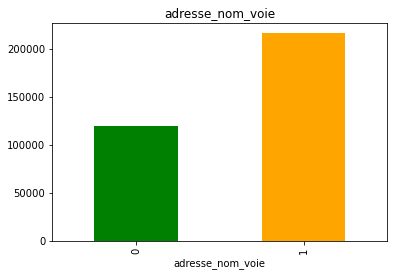

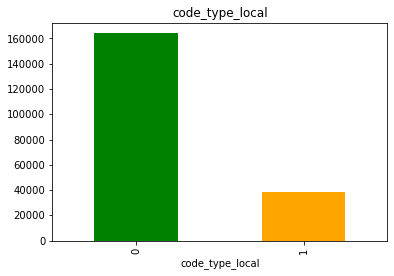

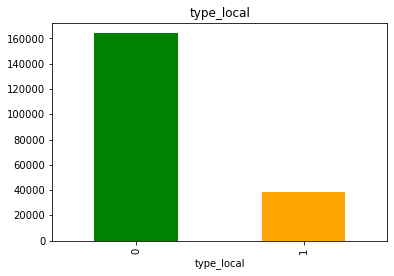

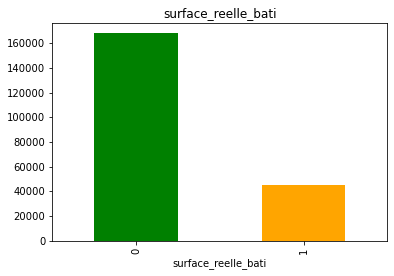

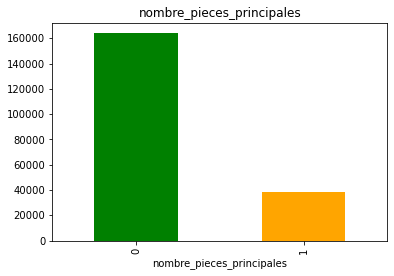

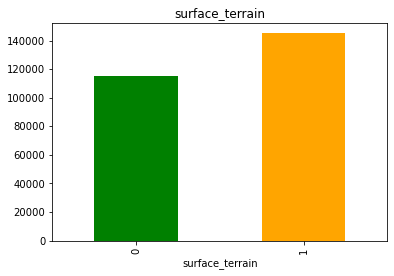

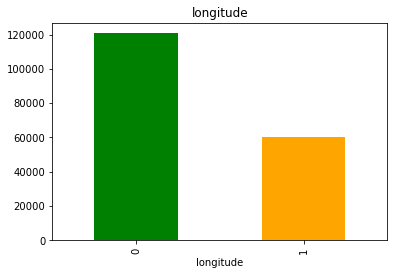

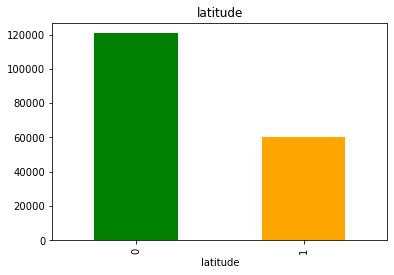

In [4]:
# distribution des variables numériquees
def analyse_na_value(df, var):
    df = df.copy()
    
    # mise en place d'une variable qui indique 1 si l'information manque ou zéro si l'information est présente
    df[var] = np.where(df[var].isnull(), 1, 0)
    
    # on calcule la valeur fonciere moyenne où l'information est manquante ou présente
    df.groupby(var)['valeur_fonciere'].median().plot.bar(color=['green', 'orange'])
    plt.title(var)
    plt.show()
    
for var in vars_with_na:
    analyse_na_value(data, var)

### Variables numériques

In [5]:
# liste des variables numériques
num_vars = [var for var in data.columns if data[var].dtypes != 'O']

print('Nombre des variables numériques: ', len(num_vars))

# visualisation
data[num_vars].head()

Nombre des variables numériques:  8


,valeur_fonciere,nombre_lots,code_type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
0,115000.0,0,NaN,NaN,NaN,788.0,5.203419,46.176087
1,1.0,0,NaN,NaN,NaN,42.0,4.975828,46.277320
2,1.0,0,NaN,NaN,NaN,50.0,4.904049,46.337128
3,258000.0,0,2.0,120.0,5.0,655.0,5.205776,46.197455
4,175050.0,0,1.0,99.0,5.0,471.0,5.361589,46.274684


#### Variables discrètes

In [6]:
# liste des variables discrètes
discrete_vars = [var for var in num_vars if len(data[var].unique())<100]

print('Nombre des variables discrètes: ', len(discrete_vars))

# visualisation
data[discrete_vars].head()

Nombre des variables discrètes:  3


,nombre_lots,code_type_local,nombre_pieces_principales
0,0,NaN,NaN
1,0,NaN,NaN
2,0,NaN,NaN
3,0,2.0,5.0
4,0,1.0,5.0


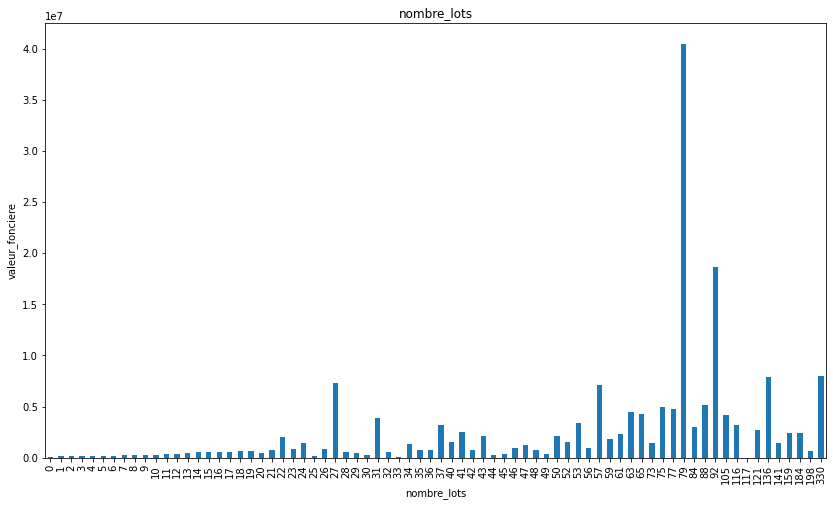

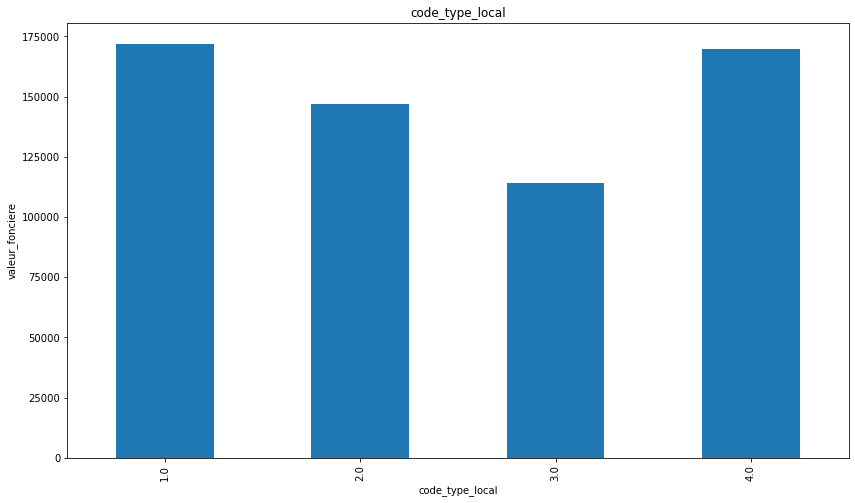

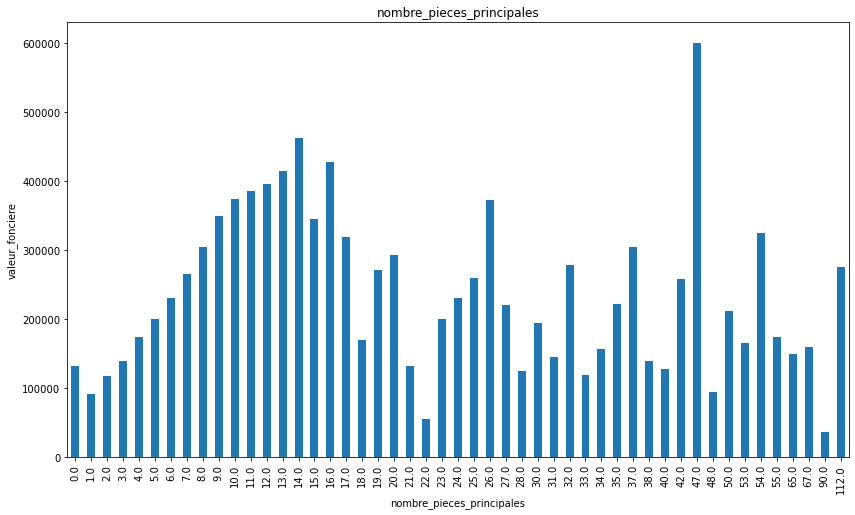

In [7]:
# distribution des variables discrètes
def analyse_discrete(df, var):
    df = df.copy()
    df.groupby(var)['valeur_fonciere'].median().plot.bar(figsize=(14,8))
    plt.title(var)
    plt.ylabel('valeur_fonciere')
    plt.show()
    
for var in discrete_vars:
    analyse_discrete(data, var)

#### Variables continues

In [8]:
# liste des variables continues
cont_vars = [var for var in num_vars if var not in discrete_vars]

print('Nombre des variables continues: ', len(cont_vars))

# visualisation
data[cont_vars].head()

Nombre des variables continues:  5


,valeur_fonciere,surface_reelle_bati,surface_terrain,longitude,latitude
0,115000.0,NaN,788.0,5.203419,46.176087
1,1.0,NaN,42.0,4.975828,46.277320
2,1.0,NaN,50.0,4.904049,46.337128
3,258000.0,120.0,655.0,5.205776,46.197455
4,175050.0,99.0,471.0,5.361589,46.274684


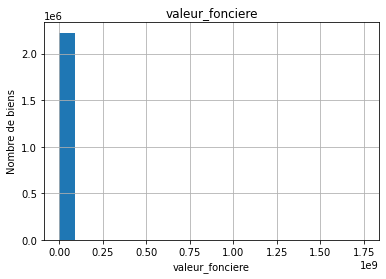

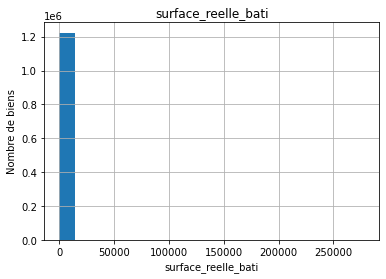

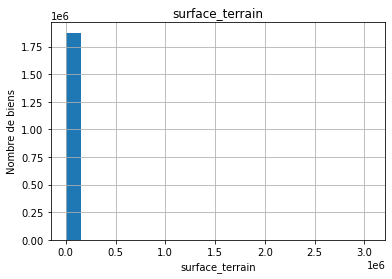

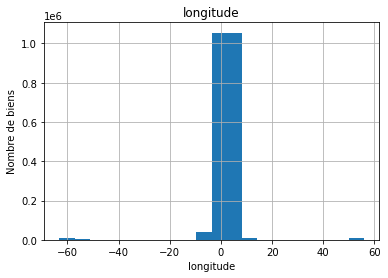

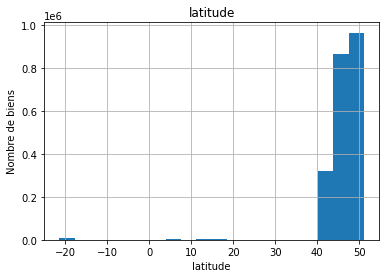

In [9]:
# distribution 
def analyse_continous(df, var):
    df = df.copy()
    df[var].hist(bins=20)
    plt.ylabel('Nombre de biens')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in cont_vars:
    analyse_continous(data, var)

Nous voyons que toutes les variables ci-dessus ne sont pas normalement distribuées, y compris la variable cible.
Évaluons également si une transformation logarithmique rend les variables plus gaussienne.

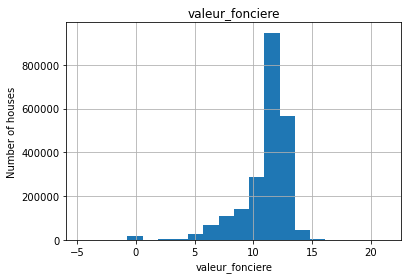

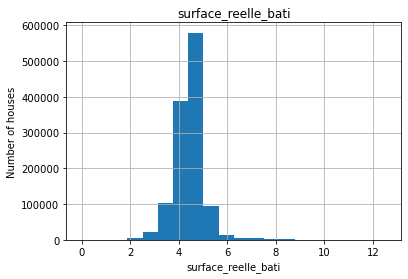

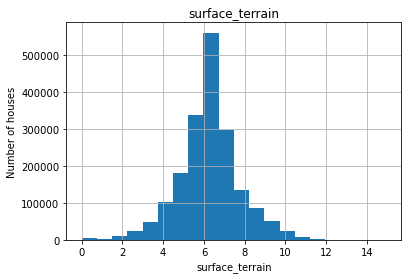

C:\Users\amand\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


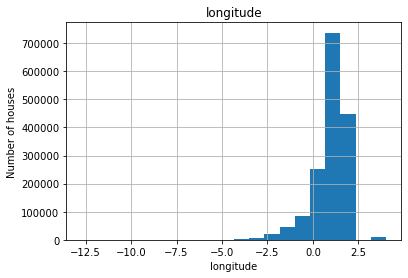

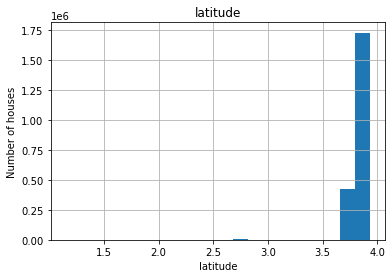

In [10]:
def analyse_transformed_continous(df, var):
    df = df.copy()
    
    # log ne prend pas de valeurs négatives, alors soyons prudents et sautons ces variables
    if 0 in data[var].unique():
        pass
    else:
        # transformation
        df[var] = np.log(df[var])
        df[var].hist(bins=20)
        plt.ylabel('Number of houses')
        plt.xlabel(var)
        plt.title(var)
        plt.show()
    
for var in cont_vars:
    analyse_transformed_continous(data, var)

C:\Users\amand\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


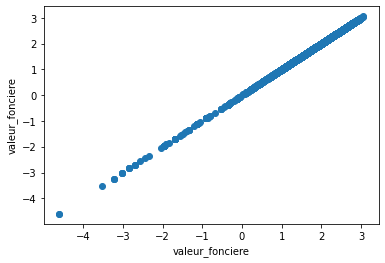

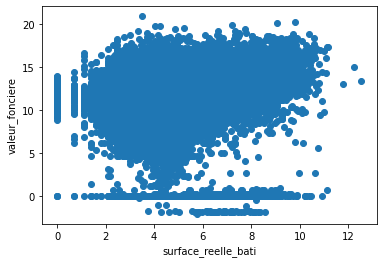

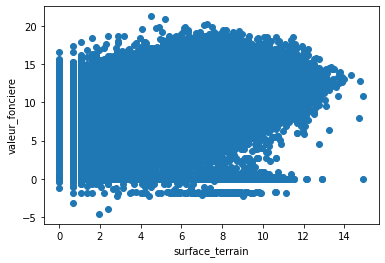

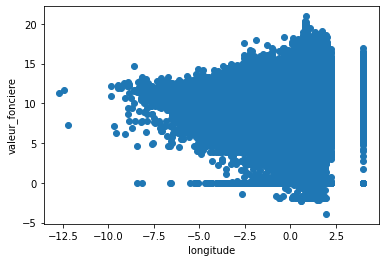

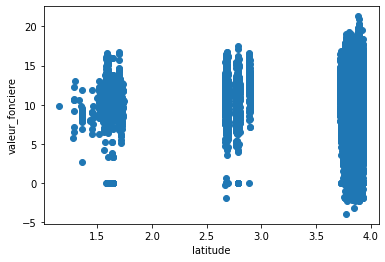

In [11]:
# regardons maintenant en fonction des valeurs foncières
def transform_analyse_continous(df, var):
    df = df.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in data[var].unique():
        pass
    else:
        # log transform
        df[var] = np.log(df[var])
        df['valeur_fonciere'] = np.log(df['valeur_fonciere'])
        plt.scatter(df[var], df['valeur_fonciere'])
        plt.ylabel('valeur_fonciere')
        plt.xlabel(var)
        plt.show()
    
for var in cont_vars:
    if var !='valeur fonciere':
        transform_analyse_continous(data, var)

#### Outliers

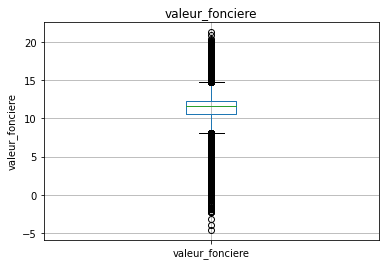

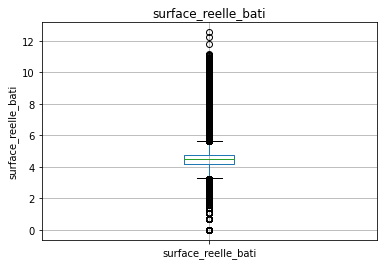

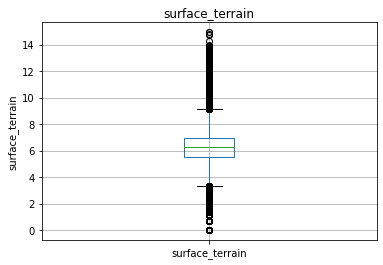

C:\Users\amand\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


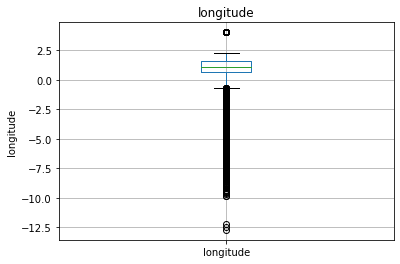

C:\Users\amand\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


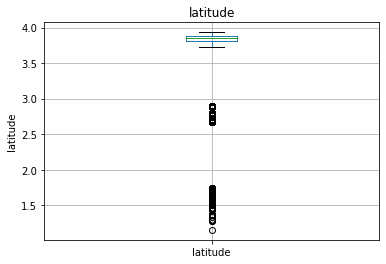

In [12]:
# visualisation des outliers dans les variables continues
def find_outliers(df, var):
    df = df.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in data[var].unique():
        pass
    else:
        df[var] = np.log(df[var])
        df.boxplot(column=var)
        plt.title(var)
        plt.ylabel(var)
        plt.show()
    
for var in cont_vars:
    find_outliers(data, var)

Les variables continues contiennent des valeurs aberrantes. Les valeurs aberrantes ont tendance à affecter les performances du modèle linéaire. Il vaut donc la peine de passer du temps à comprendre si la suppression des valeurs aberrantes ajoutera une valeur de performance à notre modèle final d'apprentissage automatique.

### Variables catégoriques

In [13]:
cat_vars = [var for var in data.columns if data[var].dtypes=='O']

print('Nombre de variables catégoriques: ', len(cat_vars))

# visualisation
data[cat_vars].head()

Nombre de variables catégoriques:  9


,id_mutation,date_mutation,nature_mutation,adresse_nom_voie,nom_commune,code_departement,id_parcelle,type_local,id_bien
0,2017-2,2017-01-05,Vente,LES VAVRES,Péronnas,01,01289000AR0388,NaN,01289000AR0388-01
1,2017-3,2017-01-06,Vente,LA POIPE,Saint-Cyr-sur-Menthon,01,01343000ZM0197,NaN,01343000ZM0197-01
2,2017-4,2017-01-09,Vente,MONTGRIMOUX CENTRE,Feillens,01,01159000AH0996,NaN,01159000AH0996-01
3,2017-5,2017-01-03,Vente,IMP DES PINSONS,Saint-Denis-lès-Bourg,01,01344000AK0042,Appartement,01344000AK0042-01
4,2017-6,2017-01-05,Vente,SAINT MICHEL,Val-Revermont,01,01426000ZI0195,Maison,01426000ZI0195-01


Regardons combien il y a de catégories dans chaque variables

In [14]:
for var in cat_vars:
    print(var, len(data[var].unique()), ' categories')

id_mutation 2224142  categories
date_mutation 904  categories
nature_mutation 6  categories
adresse_nom_voie 587357  categories
nom_commune 31012  categories
code_departement 97  categories
id_parcelle 2224142  categories
type_local 5  categories
id_bien 2224142  categories


Les variables `id_mutation`, `id_bien`, `id_parcelle` correspondent aux Id et ne seront pas prises en comptes tout comme la variable `date_mutation`.

In [ ]:
for var in cat_vars:
    analyse_discrete(data, var)
